In [112]:
#Section 1: Decision Tree
#Single class decision tree 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Loading the dataset
test_data = pd.read_csv('TargetData.csv')


#Print the first 5 rows of the dataframe.
test_data.head()

#X consists of 58 features. Each feature represents 1 test in the long test flow.
X = test_data.drop(["ID","SB","COL","Margin","Block","ROW"],axis = 1)
#Y can be one of ROW,COL,SB. ROW means the failure is on a row of memory array. 
#COL means the failure is on a column of the cell array.
#SB is single bit failure inside the memory.
y = test_data.ROW #COL #SB

In [113]:
#post pruning function on decision tree
from sklearn.tree._tree import TREE_LEAF

def is_leaf(inner_tree, index):
    # Check whether node is leaf node
    return (inner_tree.children_left[index] == TREE_LEAF and 
            inner_tree.children_right[index] == TREE_LEAF)

def prune_index(inner_tree, decisions, index=0):
    # Start pruning from the bottom - if we start from the top, we might miss
    # nodes that become leaves during pruning.
    # Do not use this directly - use prune_duplicate_leaves instead.
    if not is_leaf(inner_tree, inner_tree.children_left[index]):
        prune_index(inner_tree, decisions, inner_tree.children_left[index])
    if not is_leaf(inner_tree, inner_tree.children_right[index]):
        prune_index(inner_tree, decisions, inner_tree.children_right[index])

    # Prune children if both children are leaves now and make the same decision:     
    if (is_leaf(inner_tree, inner_tree.children_left[index]) and
        is_leaf(inner_tree, inner_tree.children_right[index]) and
        (decisions[index] == decisions[inner_tree.children_left[index]]) and 
        (decisions[index] == decisions[inner_tree.children_right[index]])):
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
        ##print("Pruned {}".format(index))

def prune_duplicate_leaves(mdl):
    # Remove leaves if both 
    decisions = mdl.tree_.value.argmax(axis=2).flatten().tolist() # Decision for each node
    prune_index(mdl.tree_, decisions)

In [114]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=2, stratify=y)

from sklearn.tree import DecisionTreeClassifier

#select best depth
max_accuracy=0
best_depth=12
best_impurity_decrease=0.0001
best_weight_fraction_leaf=0.001
for DEPTH in range(12,21,1):
    dt = DecisionTreeClassifier(criterion='entropy',max_depth=DEPTH,random_state=0,min_impurity_decrease=0.0001,min_weight_fraction_leaf=0.001)
    dt.fit(X_train, y_train)
    #post_pruning
    prune_duplicate_leaves(dt)

    print(DEPTH,dt.score(X_test, y_test))
    if dt.score(X_test, y_test)>max_accuracy: 
        max_accuracy=dt.score(X_test, y_test)
        best_depth=DEPTH

#select best impurity decrease
for impurity_decrease in range(5,15,1):

    dt = DecisionTreeClassifier(criterion='entropy',max_depth=best_depth,random_state=0,min_impurity_decrease=impurity_decrease*0.00001,min_weight_fraction_leaf=0.001)
    dt.fit(X_train, y_train)
    #post_pruning
    prune_duplicate_leaves(dt)

    print(best_depth,impurity_decrease,dt.score(X_test, y_test))
    if dt.score(X_test, y_test)>max_accuracy: 
        max_accuracy=dt.score(X_test, y_test)
        best_impurity_decrease=impurity_decrease*0.00001

#select best weight fraction leaf
for weight_fraction_leaf in range(5,15,1):
    dt = DecisionTreeClassifier(criterion='entropy',max_depth=best_depth,random_state=0,min_impurity_decrease=best_impurity_decrease,min_weight_fraction_leaf=weight_fraction_leaf*0.0001)
    dt.fit(X_train, y_train)
    #post_pruning
    prune_duplicate_leaves(dt)

    print(best_depth,best_impurity_decrease,weight_fraction_leaf,dt.score(X_test, y_test))
    if dt.score(X_test, y_test)>max_accuracy: 
        max_accuracy=dt.score(X_test, y_test)
        best_weight_fraction_leaf=weight_fraction_leaf*0.0001

        
    

dt = DecisionTreeClassifier(criterion='entropy',max_depth=best_depth,random_state=0,min_impurity_decrease=best_impurity_decrease,min_weight_fraction_leaf=best_weight_fraction_leaf)
dt.fit(X_train, y_train)    

#post_pruning
prune_duplicate_leaves(dt)

print("selected depth: {:d}".format(best_depth))
print("selected best_impurity_decrease: {:.8f}".format(best_impurity_decrease))
print("selected best_weight_fraction_leaf: {:.8f}".format(best_weight_fraction_leaf))
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

12 0.8195926285160039
13 0.8215324927255092
14 0.8205625606207565
15 0.8186226964112512
16 0.8205625606207565
17 0.8205625606207565
18 0.8205625606207565
19 0.8166828322017459
20 0.8186226964112512
13 5 0.8215324927255092
13 6 0.8215324927255092
13 7 0.8215324927255092
13 8 0.8215324927255092
13 9 0.8215324927255092
13 10 0.8215324927255092
13 11 0.8215324927255092
13 12 0.8215324927255092
13 13 0.8215324927255092
13 14 0.8215324927255092
13 0.0001 5 0.8176527643064986
13 0.0001 6 0.8176527643064986
13 0.0001 7 0.8176527643064986
13 0.0001 8 0.8176527643064986
13 0.0001 9 0.8176527643064986
13 0.0001 10 0.8215324927255092
13 0.0001 11 0.8215324927255092
13 0.0001 12 0.8215324927255092
13 0.0001 13 0.8215324927255092
13 0.0001 14 0.8215324927255092
selected depth: 13
selected best_impurity_decrease: 0.00010000
selected best_weight_fraction_leaf: 0.00100000
Accuracy on training set: 0.847
Accuracy on test set: 0.822


In [115]:
y_pred = dt.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[646  47]
 [137 201]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       693
           1       0.81      0.59      0.69       338

    accuracy                           0.82      1031
   macro avg       0.82      0.76      0.78      1031
weighted avg       0.82      0.82      0.81      1031



In [116]:
#DT visualizatin method 1

from sklearn.tree import export_graphviz

dotfile = open("dt2.dot", 'w')

export_graphviz(dt, out_file=dotfile,feature_names = X.columns,class_names=['0','1'])
dotfile.close()
# Copying the contents of the created file ('dt2.dot' ) to a graphviz rendering agent at http://webgraphviz.com/
# check out https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html



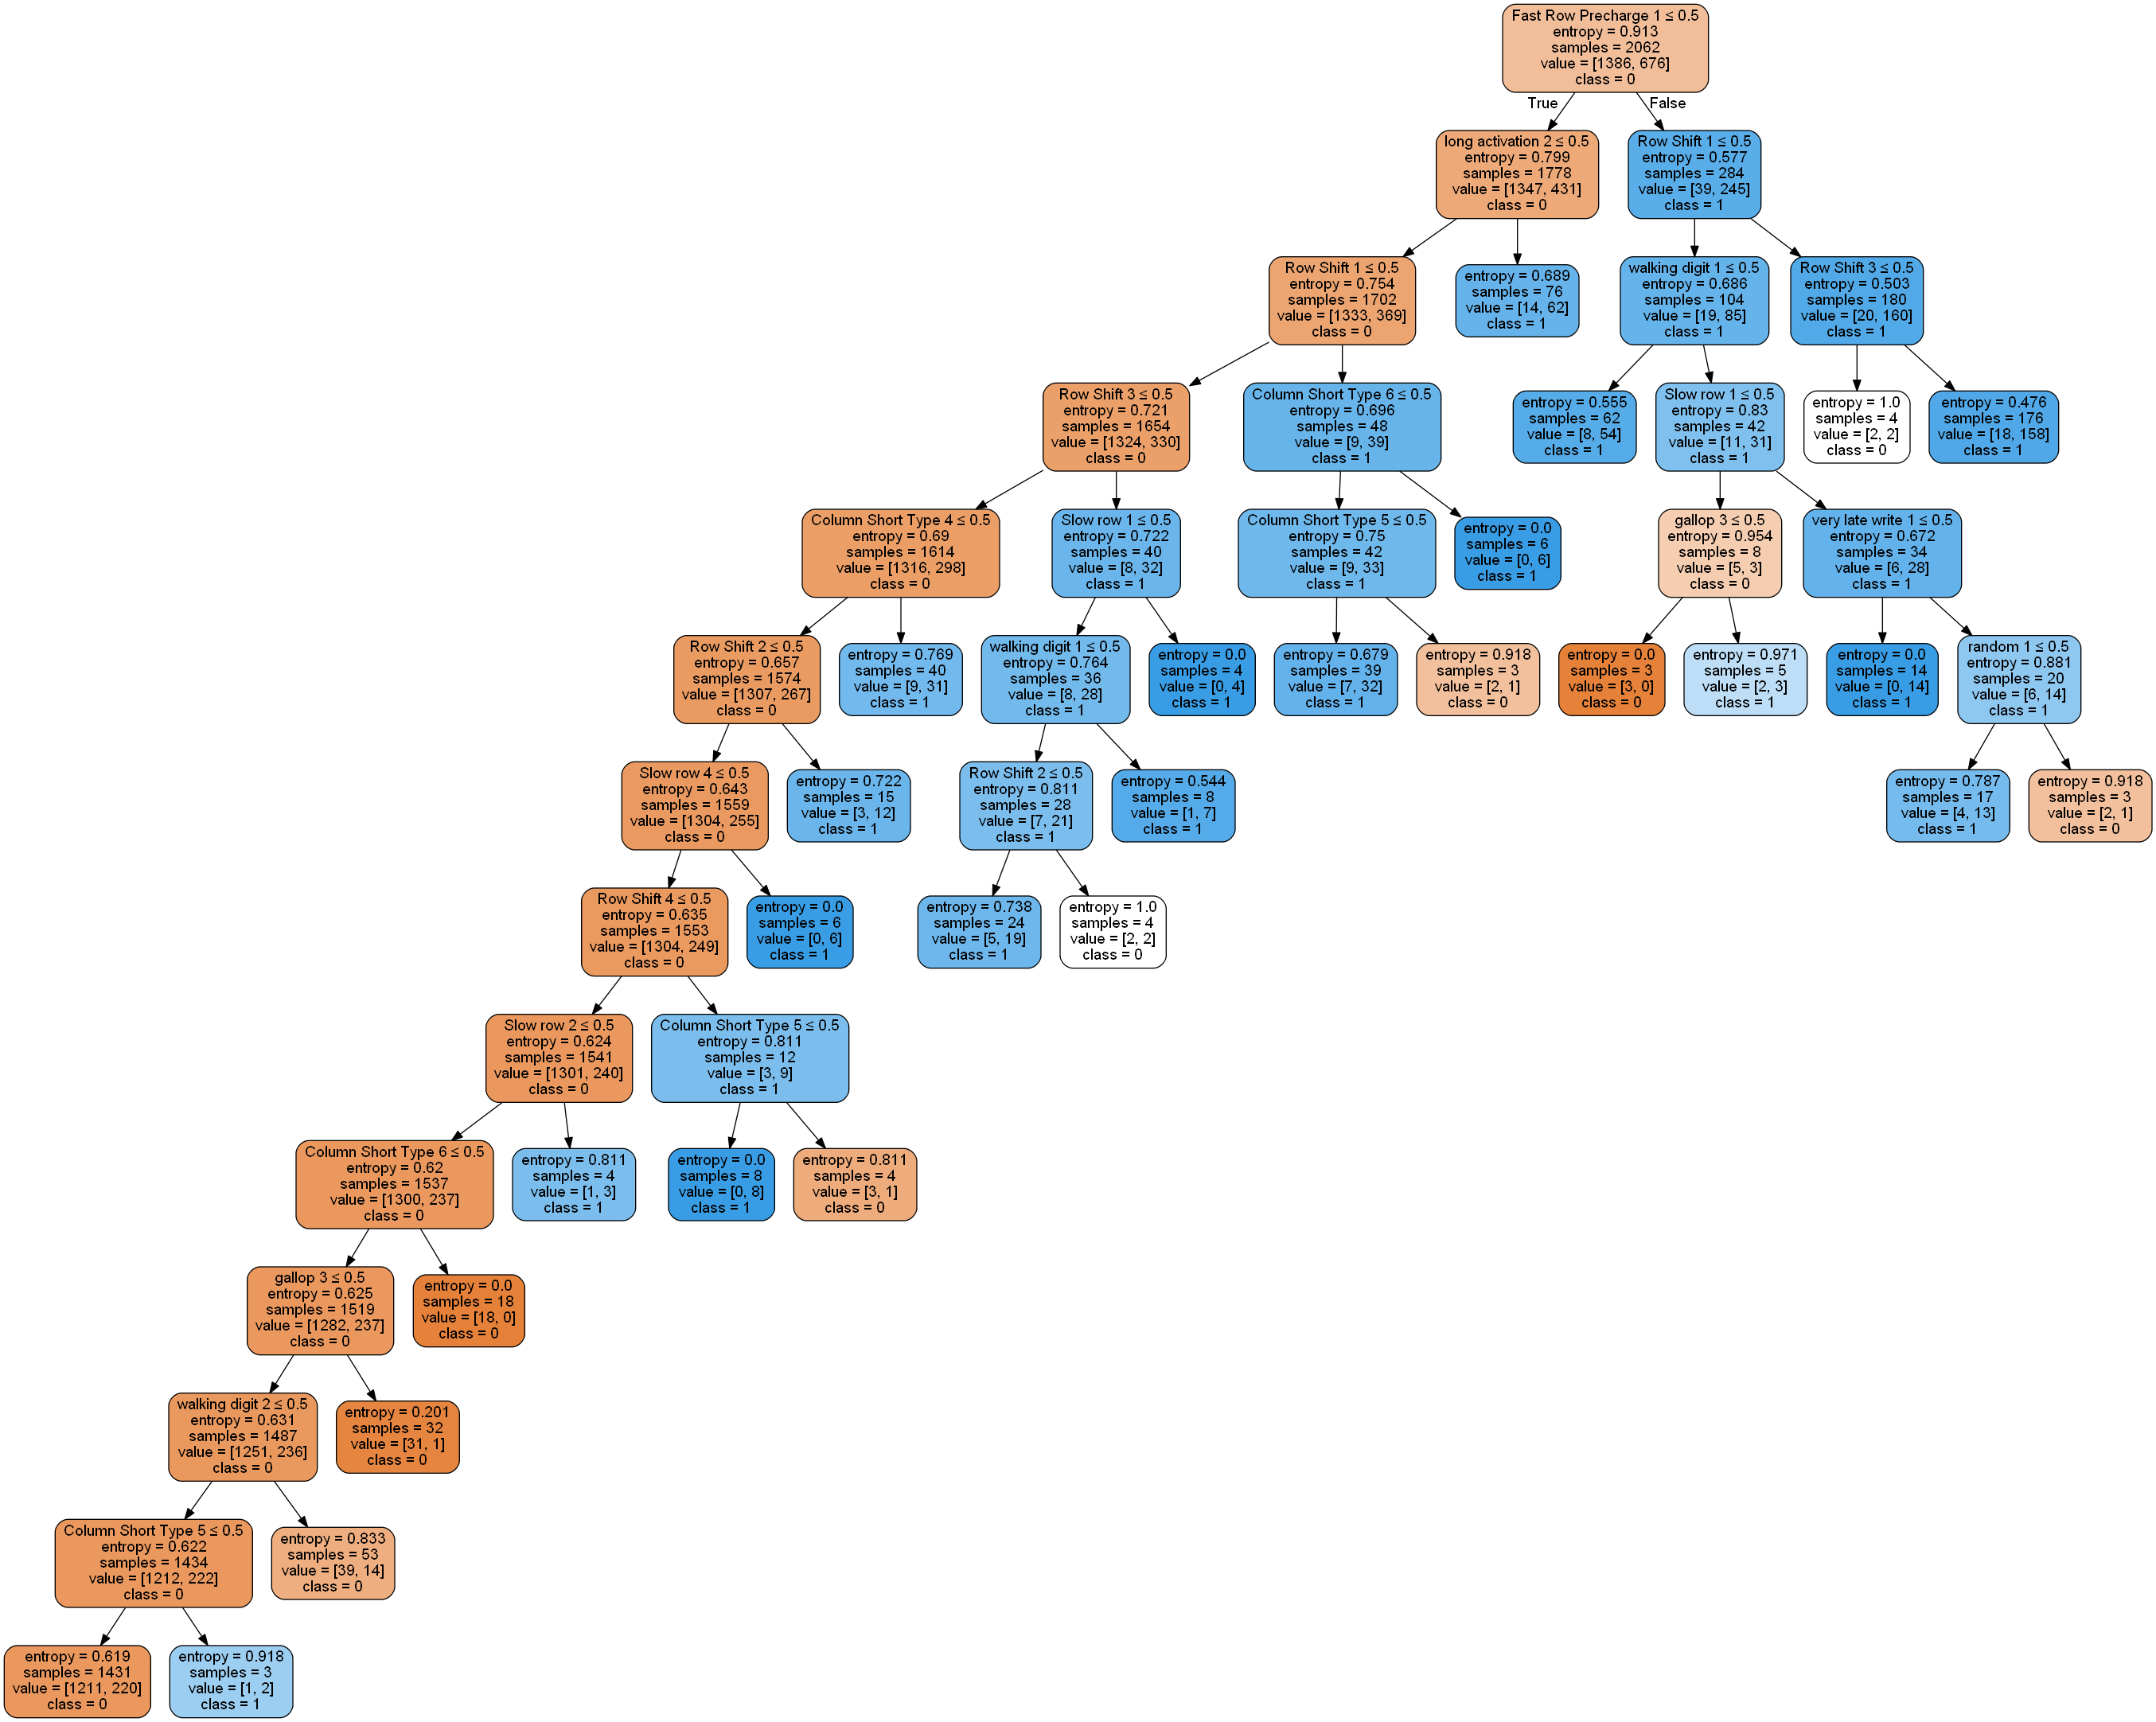

In [117]:
#DT visualizatin method 3
#!conda install -y pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
#os.environ["PATH"] += os.pathsep + 'C:/Users/boonping/graphviz-2.38/release/bin'

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('testClassified.png')
Image(graph.create_png())

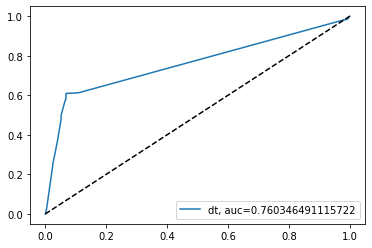

In [118]:
from sklearn import metrics

y_pred_proba = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="dt, auc="+str(auc))
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.show()

In [119]:
print(dt.feature_importances_)
#print(sorted(dt.feature_importances_))

ranked_feature=[]
for i in range(58):
    ranked_feature.append('')
sorted_importance=sorted(dt.feature_importances_)
for i in range( len(dt.feature_importances_) ):
    if dt.feature_importances_[i]>0.20*sorted_importance[-1] or sorted_importance.index(dt.feature_importances_[i]) > len(dt.feature_importances_)-best_depth-1:
        #print(i)
        ranked_feature[57-sorted_importance.index(dt.feature_importances_[i])]=test_data.columns[i+1]
        
for f in ranked_feature:
    if f != "":
        print(f)
    

[0.         0.         0.         0.46199445 0.09306486 0.
 0.00812766 0.00887882 0.         0.         0.         0.00395213
 0.00446376 0.         0.         0.00787202 0.         0.13123148
 0.         0.0763839  0.         0.         0.         0.
 0.01038585 0.03414878 0.08160467 0.00231421 0.02447877 0.
 0.01804859 0.         0.         0.         0.         0.02324498
 0.         0.         0.         0.00980508 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
Fast Row Precharge 1
long activation 2
Row Shift 1
Row Shift 3
Column Short Type 4
Row Shift 2
Slow row 4
Row Shift 4
Column Short Type 5
gallop 3
Column Short Type 6
Slow row 1
very late write 1


In [120]:
#multi-class decision tree which will be evaluate to choose the best method

#Forming 8 class from 3 columns, coded as 0 to 7
#['Overkill','SB','COL','SB+COL','ROW','ROW+SB','ROW+COL','SB+ROW+COL']
y = test_data.SB+2*test_data.COL+4*test_data.ROW
'''
for r in range(len(test_data)):
    print(test_data.iloc[r].SB,test_data.iloc[r].COL,test_data.iloc[r].ROW,y[r])
raise
'''

#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=2, stratify=y)

from sklearn.tree import DecisionTreeClassifier

#select best depth
max_accuracy=0
best_depth=12
best_impurity_decrease=0.0001
best_weight_fraction_leaf=0.001
for DEPTH in range(20,40,1):
    dt = DecisionTreeClassifier(criterion='entropy',max_depth=DEPTH,random_state=0,min_impurity_decrease=0.0001,min_weight_fraction_leaf=0.001)
    dt.fit(X_train, y_train)
    #post_pruning
    prune_duplicate_leaves(dt)

    print(DEPTH,dt.score(X_test, y_test))
    if dt.score(X_test, y_test)>max_accuracy: 
        max_accuracy=dt.score(X_test, y_test)
        best_depth=DEPTH
#select best impurity decrease        
for impurity_decrease in range(5,20,1):

    dt = DecisionTreeClassifier(criterion='entropy',max_depth=best_depth,random_state=0,min_impurity_decrease=impurity_decrease*0.00001,min_weight_fraction_leaf=0.001)
    dt.fit(X_train, y_train)

    #post_pruning
    prune_duplicate_leaves(dt)

    print(best_depth,impurity_decrease,dt.score(X_test, y_test))
    if dt.score(X_test, y_test)>max_accuracy: 
        max_accuracy=dt.score(X_test, y_test)
        best_impurity_decrease=impurity_decrease*0.00001
#select weight fraction leaf        
for weight_fraction_leaf in range(5,15,1):
    dt = DecisionTreeClassifier(criterion='entropy',max_depth=best_depth,random_state=0,min_impurity_decrease=best_impurity_decrease,min_weight_fraction_leaf=weight_fraction_leaf*0.0001)
    dt.fit(X_train, y_train)
    #post_pruning
    prune_duplicate_leaves(dt)

    print(best_depth,best_impurity_decrease,weight_fraction_leaf,dt.score(X_test, y_test))
    if dt.score(X_test, y_test)>max_accuracy: 
        max_accuracy=dt.score(X_test, y_test)
        best_weight_fraction_leaf=weight_fraction_leaf*0.0001

        
    

dt = DecisionTreeClassifier(criterion='entropy',max_depth=best_depth,random_state=0,min_impurity_decrease=best_impurity_decrease,min_weight_fraction_leaf=best_weight_fraction_leaf)
dt.fit(X_train, y_train)    

#post_pruning
prune_duplicate_leaves(dt)

print("selected depth: {:d}".format(best_depth))
print("selected best_impurity_decrease: {:.8f}".format(best_impurity_decrease))
print("selected best_weight_fraction_leaf: {:.8f}".format(best_weight_fraction_leaf))
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

20 0.5548011639185257
21 0.5548011639185257
22 0.5557710960232783
23 0.5567410281280311
24 0.5548011639185257
25 0.5606207565470417
26 0.5683802133850631
27 0.5732298739088264
28 0.5800193986420951
29 0.5819592628516004
30 0.5838991270611057
31 0.5829291949563531
32 0.5829291949563531
33 0.5829291949563531
34 0.5829291949563531
35 0.5848690591658584
36 0.5838991270611057
37 0.5838991270611057
38 0.5838991270611057
39 0.5838991270611057
35 5 0.5848690591658584
35 6 0.5848690591658584
35 7 0.5848690591658584
35 8 0.5848690591658584
35 9 0.5848690591658584
35 10 0.5848690591658584
35 11 0.5848690591658584
35 12 0.5848690591658584
35 13 0.5848690591658584
35 14 0.5848690591658584
35 15 0.5848690591658584
35 16 0.5848690591658584
35 17 0.5848690591658584
35 18 0.5848690591658584
35 19 0.5848690591658584
35 0.0001 5 0.5645004849660524
35 0.0001 6 0.5645004849660524
35 0.0001 7 0.5645004849660524
35 0.0001 8 0.5645004849660524
35 0.0001 9 0.5645004849660524
35 0.0001 10 0.5848690591658584
35 

In [121]:
#DT visualizatin method 3
#!conda install -y pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
#os.environ["PATH"] += os.pathsep + 'C:/Users/boonping/graphviz-2.38/release/bin'

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['Overkill','SB','COL','SB+COL','ROW','ROW+SB','ROW+COL','SB+ROW+COL'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('testClassified.png')
Image(graph.create_png())

In [122]:
#multi-class decision tree
y_pred = dt.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[108  30  25   0  14   1   0   0]
 [ 20 209   2   1   2   1   1   5]
 [ 20   8 147   0   4   0   4   3]
 [  8  43  22   2   4   0   2   8]
 [ 22   7   5   0  56   0   3   1]
 [  5  40   0   0  11   3   2   9]
 [  5   2  33   2   6   0   9  13]
 [  4   6   5   4   4   3   8  69]]
              precision    recall  f1-score   support

           0       0.56      0.61      0.58       178
           1       0.61      0.87      0.71       241
           2       0.62      0.79      0.69       186
           3       0.22      0.02      0.04        89
           4       0.55      0.60      0.57        94
           5       0.38      0.04      0.08        70
           6       0.31      0.13      0.18        70
           7       0.64      0.67      0.65       103

    accuracy                           0.58      1031
   macro avg       0.49      0.47      0.44      1031
weighted avg       0.53      0.58      0.53      1031



In [123]:
print(dt.feature_importances_)
#print(sorted(dt.feature_importances_))

ranked_feature=[]
for i in range(58):
    ranked_feature.append('')
sorted_importance=sorted(dt.feature_importances_)
for i in range( len(dt.feature_importances_) ):
    if dt.feature_importances_[i]>0.20*sorted_importance[-1] or sorted_importance.index(dt.feature_importances_[i]) > len(dt.feature_importances_)-best_depth-1:
        #print(i)
        ranked_feature[57-sorted_importance.index(dt.feature_importances_[i])]=test_data.columns[i+1]
        
for f in ranked_feature:
    if f != "":
        print(f)
    

[0.01427442 0.03889263 0.         0.04142901 0.02906708 0.0515631
 0.01882939 0.01489535 0.0361355  0.00923376 0.01035977 0.01783477
 0.00855144 0.03398275 0.12027785 0.         0.00884899 0.04338822
 0.04738087 0.20401698 0.         0.         0.01208127 0.00408352
 0.01886882 0.01636325 0.02104345 0.01734632 0.         0.
 0.         0.00872536 0.         0.01601757 0.00775949 0.01199691
 0.00597628 0.02264967 0.0013954  0.         0.00441234 0.0029139
 0.         0.03596961 0.         0.01073678 0.         0.
 0.00068209 0.         0.0098302  0.00212704 0.00796881 0.
 0.         0.00727438 0.         0.00481564]
Column Short Type 4
Amplifier 1
Column Short Type 1
gallop 2
long activation 2
Fast Row Precharge 1
long activation 1
Column Short Type 2
Amplifier 6
Column Short Type 3
Row Shift 1
Activate-to-read 2
Row Shift 3
gallop 3
very late write 1
walking digit 1
random 1
Row Shift 2
Amplifier 2
Slow row 1
cell charge
block inversion
Row Shift 4
Column Short Type 7
Activate-to-read 

In [124]:
scaler = StandardScaler()  
scaler.fit(X_train)
X_test1=X_test
X_test2=X_test
X_train = scaler.transform(X_train)  
X_test1 = scaler.transform(X_test1)  

from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train)  

predictions = mlp.predict(X_test1)  


print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(mlp.coefs_[0][1])

Iteration 1, loss = 2.18990805
Iteration 2, loss = 2.11330677
Iteration 3, loss = 2.06308131
Iteration 4, loss = 2.01852253
Iteration 5, loss = 1.97227312
Iteration 6, loss = 1.92865317
Iteration 7, loss = 1.88715534
Iteration 8, loss = 1.84281018
Iteration 9, loss = 1.80506144
Iteration 10, loss = 1.77067565
Iteration 11, loss = 1.74254314
Iteration 12, loss = 1.71821237
Iteration 13, loss = 1.69807467
Iteration 14, loss = 1.67986982
Iteration 15, loss = 1.66387734
Iteration 16, loss = 1.64902611
Iteration 17, loss = 1.63465949
Iteration 18, loss = 1.62043795
Iteration 19, loss = 1.60676736
Iteration 20, loss = 1.59420735
Iteration 21, loss = 1.58138189
Iteration 22, loss = 1.56948030
Iteration 23, loss = 1.55745840
Iteration 24, loss = 1.54538335
Iteration 25, loss = 1.53404677
Iteration 26, loss = 1.52172875
Iteration 27, loss = 1.51031615
Iteration 28, loss = 1.49970832
Iteration 29, loss = 1.48936269
Iteration 30, loss = 1.47974676
Iteration 31, loss = 1.47082271
Iteration 32, los

Iteration 253, loss = 1.19711032
Iteration 254, loss = 1.19628203
Iteration 255, loss = 1.19609207
Iteration 256, loss = 1.19539340
Iteration 257, loss = 1.19558396
Iteration 258, loss = 1.19511895
Iteration 259, loss = 1.19599949
Iteration 260, loss = 1.19449955
Iteration 261, loss = 1.19473943
Iteration 262, loss = 1.19506947
Iteration 263, loss = 1.19448027
Iteration 264, loss = 1.19401629
Iteration 265, loss = 1.19429666
Iteration 266, loss = 1.19415092
Iteration 267, loss = 1.19343538
Iteration 268, loss = 1.19327061
Iteration 269, loss = 1.19300611
Iteration 270, loss = 1.19312398
Iteration 271, loss = 1.19299156
Iteration 272, loss = 1.19251455
Iteration 273, loss = 1.19262370
Iteration 274, loss = 1.19202263
Iteration 275, loss = 1.19188865
Iteration 276, loss = 1.19243155
Iteration 277, loss = 1.19147125
Iteration 278, loss = 1.19153924
Iteration 279, loss = 1.19086596
Iteration 280, loss = 1.19103668
Iteration 281, loss = 1.19065091
Iteration 282, loss = 1.19057913
Iteration 

Iteration 504, loss = 1.16381868
Iteration 505, loss = 1.16220842
Iteration 506, loss = 1.16111697
Iteration 507, loss = 1.16093716
Iteration 508, loss = 1.16191865
Iteration 509, loss = 1.16042740
Iteration 510, loss = 1.16093805
Iteration 511, loss = 1.16047083
Iteration 512, loss = 1.16052530
Iteration 513, loss = 1.16030844
Iteration 514, loss = 1.15975399
Iteration 515, loss = 1.16107711
Iteration 516, loss = 1.16016852
Iteration 517, loss = 1.16014753
Iteration 518, loss = 1.16108652
Iteration 519, loss = 1.15970242
Iteration 520, loss = 1.15971730
Iteration 521, loss = 1.16048725
Iteration 522, loss = 1.15970418
Iteration 523, loss = 1.15983412
Iteration 524, loss = 1.15973688
Iteration 525, loss = 1.15963825
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy 0.5848690591658584
[[102  31  29   0  14   1   0   1]
 [ 19 208   2   1   2   4   0   5]
 [ 18   7 148   0   5   1   3   4]
 [  6  42  21   3   3   1   1  12]
 [ 16   8   6   

In [125]:


feature={}
node_feature=[]

for l in range(10):
    min_weight=mlp.coefs_[0][0:][l].min()
    max_weight=mlp.coefs_[0][0:][l].max()
    if abs(min_weight)>abs(max_weight): max_weight=abs(min_weight)
    max_weight=abs(max_weight)
    for i in range(58):
        weight = mlp.coefs_[0][i][l]
        if weight>0 and weight/max_weight>0.33: 
            if test_data.columns[i+1] not in feature: 
                feature[ test_data.columns[i+1] ]=0
            feature[ test_data.columns[i+1] ]+=1
            node_feature.append(test_data.columns[i+1])
        #elif weight<0 and weight/max_weight>0.33: 
            #if test_data.columns[i+1] not in feature: 
            #    feature[ test_data.columns[i+1] ]=0
            #feature[ test_data.columns[i+1] ]+=1
            #node_feature.append(test_data.columns[i+1])
    #print(node_feature)
    #node_feature=[]
        
#for f in feature: 
#    if feature[f]>5: print(f)
        
    
    

In [126]:
featurelist=[]
feature_freq=[]
notfeature_freq=[]
for testnum in range(58):
    featurelist.append( test_data.columns[testnum+1] )
    feature_freq.append(0)
    notfeature_freq.append(0)

for i in range(len(X_test)):
    if predictions[i]==1:
        total_ones=0
        total_zeros=0
        for testnum in range(58):
            if X_test.iloc[i,testnum]>=0.45: #if transformed X is greater than 0.5
                total_ones+=1
            else:
                total_zeros+=1
        
        for testnum in range(58):
            if X_test1[i][testnum]>=0.45: #if transformed X is greater than 0.5
                feature_freq[testnum]+=1/total_ones
            else:
                notfeature_freq[testnum]+=1/total_zeros
                
#print (X_test[0])
sorted_featurelist=[]
sorted_notfeaturelist=[]
for i in range(58):
    sorted_featurelist.append([])
    sorted_notfeaturelist.append([])
sorted_freq=sorted( feature_freq )                
for i in range(len(feature_freq)):
    if feature_freq[i]>0.25*sorted_freq[-1] or sorted_freq.index( feature_freq[i] )>0.75*58:
        if feature_freq[i]>1.5*notfeature_freq[i]:
            sorted_featurelist[57-sorted_freq.index( feature_freq[i] )]=[featurelist[i],feature_freq[i],notfeature_freq[i]]
        
#positive,negative prediction frequency for selected features with significant importance
for f in sorted_featurelist:
    if f!=[]:
        print(f)    
        

['Long pause 1', 95.83333333333333, 4.3969937507205215]
['Long pause 2', 79.16666666666666, 4.694503696914674]
['cell charge', 65.2, 4.940480576704855]
['gallop 2', 17.7, 5.727002826384985]
['walking digit 2', 14.866666666666665, 5.581859484625104]
['gallop 3', 12.866666666666667, 5.815046799955272]
['Activate-to-read 1', 11.958333333333332, 5.615513237360287]


In [127]:
from sklearn.svm import SVC

scaler = StandardScaler()  
scaler.fit(X_train) 
X_train= scaler.transform(X_train)  
#X_test2= scaler.transform(X_test2) 
svm=SVC(kernel="rbf", gamma=5, C=1) 
svm.fit(X_train, y_train)
predictions = svm.predict(X_test1)
svm_pred=predictions
#print(predictions)
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions)) 
print("Accuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test1, y_test)))
#print(predictions)


[[100  30  27   0  14   1   0   6]
 [ 19 202   2   0   2   0   0  16]
 [ 16   7 139   3   3   0   2  16]
 [  4  37  17   5   3   0   2  21]
 [ 16   8   8   0  57   0   2   3]
 [  4  37   0   0   8   1   0  20]
 [  3   2  31   0   6   0   6  22]
 [  1   5   4   0   3   1   0  89]]
              precision    recall  f1-score   support

           0       0.61      0.56      0.59       178
           1       0.62      0.84      0.71       241
           2       0.61      0.75      0.67       186
           3       0.62      0.06      0.10        89
           4       0.59      0.61      0.60        94
           5       0.33      0.01      0.03        70
           6       0.50      0.09      0.15        70
           7       0.46      0.86      0.60       103

    accuracy                           0.58      1031
   macro avg       0.54      0.47      0.43      1031
weighted avg       0.57      0.58      0.52      1031

Accuracy on training set: 0.657
Accuracy on test set: 0.581


In [128]:
#hybrid competitive system
#X_raw=X
#y_raw=y
#X_train,X_test,y_train,y_test = train_test_split(X_raw,y_raw,test_size=1/5,random_state=2, stratify=y_raw)
#X=X_test
#y=y_test

#feature correlation
td=test_data.drop("ID",axis=1)
L=len(td.SB)
dt_pred=dt.predict(X_test)
dt_score=0
dt_weight=0
#print(confusion_matrix(y_test,dt_pred))  
#print(classification_report(y_test,dt_pred)) 
#Xscaled=scaler.transform(X_test) 
mlp_pred=mlp.predict(X_test1)
mlp_score=0
mlp_weight=0
#print(confusion_matrix(y_test,mlp_pred))  
#print(classification_report(y_test,mlp_pred)) 
#print(svm)
#print(X)
#Xscaled1=scaler.transform(X_test) 
'''
svm_pred=svm.predict(X_test2)
print(confusion_matrix(y_test,svm_pred))  
print(classification_report(y_test,svm_pred)) 
'''
svm_score=0
svm_weight=0
#print(X)
#print(y_test)
#print(svm_pred)

#for all 58 features
for i in range(58):
    #TrueList=td[ td.iloc[:,i]==1 ]
    
    #l=float(len(TrueList))
    SB1=0 
    COL1=0
    ROW1=0
    dt_SB1=0 
    dt_COL1=0
    dt_ROW1=0
    mlp_SB1=0 
    mlp_COL1=0
    mlp_ROW1=0
    svm_SB1=0 
    svm_COL1=0
    svm_ROW1=0
    
    #for each entry in the data
    for r in range(len(X_test)):
        #calculate total feature that carries value "1"
        if ( X_test.iloc[r,i] )==0 : continue
        one=0
        for val in (X_test.iloc[r]):
            if val==1: 
                one+=1
        if one==0: continue

        #Getting the expected ROW/COL/SB value. Note that ROW+SB will be considered as both ROW and SB
        #entry significant is expected_value/number of features =1. Will be added into total SB1/COL1/ROW1 total significant
        SB1+=(y_test.iloc[r]&1)/one
        COL1+=((y_test.iloc[r]&2)>>1)/one
        ROW1+=((y_test.iloc[r]&4)>>2)/one
        #Getting predicted value from decision table. Note that ROW+SB will be considered as both ROW and SB
        #entry significant is expected_value/number of features =1. Will be added into total dt's SB1/COL1/ROW1 total significant
        if dt_pred[r]&1==1:
            dt_SB1+=1/one
        elif dt_pred[r]&2==2:
            dt_COL1+=1/one
        elif dt_pred[r]&4==4:
            dt_ROW1+=1/one
        #Getting predicted value from MLP. Note that ROW+SB will be considered as both ROW and SB
        #entry significant is expected_value/number of features =1. Will be added into total mlp's SB1/COL1/ROW1 total significant
        if mlp_pred[r]&1==1:
            mlp_SB1+=1/one
        elif mlp_pred[r]&2==2:
            mlp_COL1+=1/one
        elif mlp_pred[r]&4==4:
            mlp_ROW1+=1/one
        #Getting predicted value from SVM. Note that ROW+SB will be considered as both ROW and SB            
        #entry significant is expected_value/number of features =1. Will be added into total svm's SB1/COL1/ROW1 total significant
        if svm_pred[r]&1==1:
            svm_SB1+=1/one
        elif svm_pred[r]&2==2:
            svm_COL1+=1/one
        elif svm_pred[r]&4==4:
            svm_ROW1+=1/one

    #Compute the total significant value for expected total, DT, MLP and SVM
    total=SB1+COL1+ROW1
    total_dt=dt_SB1+dt_COL1+dt_ROW1
    total_mlp=mlp_SB1+mlp_COL1+mlp_ROW1
    total_svm=svm_SB1+svm_COL1+svm_ROW1
    if total==0: 
        print(test_data.columns[i+1]," is redundant test")
        continue

    #print(SB1,COL1,ROW1)
    #print(dt_SB1,dt_COL1,dt_ROW1)
    #print(mlp_SB1,mlp_COL1,mlp_ROW1)
    #print(svm_SB1,svm_COL1,svm_ROW1)
    #raise
        
    #This is to get the expected outcome class from y raw data based on the total significant
    predict_outcome=[]
    #print(i,l,SB1,COL1,ROW1)
    for clas in ["SB1","COL1","ROW1"]:
        if total==0: continue
        #print(clas,eval(clas))
        if eval(clas)/total>0.5: # catch only those 50%. If none found, it is likely to be overkill.
            predict_outcome.append(clas)

    #This is to get the outcome class from decision tree prediction based on the total significant for dt             
    SB1=0
    COL1=0
    ROW1=0
    for j in range( len(dt_pred) ):
        if X_test.iloc[j,i]==1:
            if dt_pred[j]==1:
                SB1+=1
            elif dt_pred[j]==2:
                COL1+=1
            elif dt_pred[j]==3:
                ROW1+=1

    predict_outcome_dt=[]
    for clas in ["SB1","COL1","ROW1"]:
        if total_dt==0: continue
        if eval("dt_"+clas)/total_dt>0.5:
            predict_outcome_dt.append(clas)
            
    if predict_outcome_dt==predict_outcome: 
        dt_score+=total_dt/L
    dt_weight+=total_dt/L

    #This is to get the outcome class from decision tree prediction based on the total significant for mlp             
    SB1=0
    COL1=0
    ROW1=0
    for j in range( len(mlp_pred) ):
        if X_test.iloc[j,i]==1:
            if mlp_pred[j]==1:
                SB1+=1
            elif mlp_pred[j]==2:
                COL1+=1
            elif mlp_pred[j]==3:
                ROW1+=1
                
    predict_outcome_mlp=[]
    for clas in ["SB1","COL1","ROW1"]:
        if total_mlp==0: continue
        if eval("mlp_"+clas)/total_mlp>0.5:
            predict_outcome_mlp.append(clas)
            
    if predict_outcome_mlp==predict_outcome: 
        mlp_score+=total_mlp/L
    mlp_weight+=total_mlp/L

    #This is to get the outcome class from decision tree prediction based on the total significant for svm             
    SB1=0
    COL1=0
    ROW1=0
    for j in range( len(svm_pred) ):
        if X_test.iloc[j,i]==1:
            if svm_pred[j]==1:
                SB1+=1
            elif svm_pred[j]==2:
                COL1+=1
            elif svm_pred[j]==3:
                ROW1+=1
                
    predict_outcome_svm=[]
    for clas in ["SB1","COL1","ROW1"]:
        if total_svm==0: continue
        if eval("svm_"+clas)/total_svm>0.5:
            predict_outcome_svm.append(clas)
    
    
    if predict_outcome_svm==predict_outcome: 
        svm_score+=total_svm/L
    svm_weight+=total_svm/L

    
                
                
    #at the end of 1 feature. goes to other feature until finished.            
    print(test_data.columns[i+1],predict_outcome,predict_outcome_dt,predict_outcome_mlp,predict_outcome_svm)
#scaling the score
dt_score/=dt_weight
mlp_score/=mlp_weight
svm_score/=svm_weight
#score from feature correlation
print ("feature correlation score [dt,mlp,svm]:", dt_score,mlp_score,svm_score)

#accuracy score
dt_score+=dt.score(X_test, y_test)
mlp_score+=mlp.score(X_test1, y_test)
svm_score+=svm.score(X_test1, y_test)
print ("accuracy score [dt,mlp,svm]:", dt.score(X_test, y_test),mlp.score(X_test1, y_test),svm.score(X_test1, y_test))

#false classification penalty
#in the scenario, mis-classification as overkill considered to be a loss 
#while mis-classification of ROW,COL,SB as other non-related class are also considered loss
#mis-classification of ROW as ROW+SB, ROW+COL or ROW+SB+COL are not penalized. Simlilar cases extended to COL and SB.
#confusion matrix is used here
dt_cm=confusion_matrix(y_test,dt_pred)
mlp_cm=confusion_matrix(y_test,mlp_pred)
svm_cm=confusion_matrix(y_test,svm_pred)
#print(dt_cm)
num_class=8
dt_penalty=0.0
mlp_penalty=0.0
svm_penalty=0.0
#SB,COL,ROW mis-classified as overkill (class 0)
for i in range(1,num_class,1):
    dt_penalty+=dt_cm[i][0]
    mlp_penalty+=mlp_cm[i][0]
    svm_penalty+=svm_cm[i][0]
#SB mis-classified as COL/ROW (class 2,4,6)
for j in [2,4,6]:
    dt_penalty+=dt_cm[1][j]
    mlp_penalty+=mlp_cm[1][j]
    svm_penalty+=svm_cm[1][j]
#COL mis-classified as SB/ROW (class 1,4,5)
for j in [1,4,5]:
    dt_penalty+=dt_cm[2][j]
    mlp_penalty+=mlp_cm[2][j]
    svm_penalty+=svm_cm[2][j]
#ROW mis-classified as SB/COL (class 1,2,3)
for j in [1,2,3]:
    dt_penalty+=dt_cm[4][j]
    mlp_penalty+=mlp_cm[4][j]
    svm_penalty+=svm_cm[4][j]

dt_penalty/=float(L)
mlp_penalty/=float(L)
svm_penalty/=float(L)

print ("penalty [dt,mlp,svm]:",dt_penalty,mlp_penalty,svm_penalty)
dt_score-=dt_penalty
mlp_score-=mlp_penalty
svm_score-=svm_penalty
print ("overall score [dt,mlp,svm]:",dt_score,mlp_score,svm_score)

#choosing best model based on max score.
max_score=0
choice=""
for selector in ["dt","mlp","svm"]:
    if eval(selector+"_score")>max_score:
        max_score=eval(selector+"_score")
        choice=selector
print("The final choice is :",choice)  
print("choice details:\n",eval(choice))


60.26130626507628 11.962995170621676 13.030165468811436
67.16291441507587 0.05555555555555555 0.2909090909090909
67.50937906154053 0 0
67.50937906154053 0 0
cell charge ['SB1'] ['SB1'] ['SB1'] ['SB1']
17.61089197140426 10.965773428099817 13.859063199005353
3.387425845295247 0.7167600373482726 0
4.2806200526816935 3.0735658299618254 0
6.154185882643521 2.033333333333333 0
long activation 1 [] ['SB1'] ['SB1'] ['SB1']
gallop 1  is redundant test
8.003932458910837 5.42774632728074 20.39603609818625
2.8993987444761555 1.5834267040149392 19.75
3.931236297764012 1.1765891507270818 19.125
5.232825448491095 0 19.0
Fast Row Precharge 1 ['ROW1'] ['ROW1'] ['ROW1'] ['ROW1']
6.787162237086306 4.409674507862979 18.87292862814461
3.0674452511767227 0.10666666666666666 20.0
3.2148268263002326 0.05928509154315606 20.0
3.2407785845100556 0.03333333333333333 20.0
Row Shift 1 ['ROW1'] ['ROW1'] ['ROW1'] ['ROW1']
4.839821911196284 29.11370993603632 11.26418361498784
2.9398117735432447 30.07025210084033 0.25


Row Shift 5 [] ['SB1'] ['SB1'] ['SB1']
3.40559101137715 3.4581799105063142 3.0147290499450508
3.4027810265124985 0.6075757575757577 0
3.6451242874597636 0.3652324966284922 0
3.9770234507549227 0.03333333333333333 0
Column Short Type 7 [] ['SB1'] ['SB1'] ['SB1']
1.14921509083908 3.4901164513832974 0.938663142787132
0.5113622361466027 3.403311688311688 0.09090909090909091
0.7484401582245248 3.46547619047619 0
3.172249682034048 1.0416666666666667 0
Amplifier 7 ['COL1'] ['COL1'] ['COL1'] ['SB1']
3.619150249074317 3.3710275992160708 3.0188055290215297
4.225688674420144 0.19707792207792207 0
4.3170168584902635 0.20574973800780252 0
4.489433263164733 0.03333333333333333 0
very late write 3 [] ['SB1'] ['SB1'] ['SB1']
7.2543644601505965 3.9640962164226186 3.5579469431629436
8.30674928048075 0.3857142857142857 0
8.473695716031191 0.21876785016384573 0
8.459130232861703 0.23333333333333334 0
long activation 4 [] ['SB1'] ['SB1'] ['SB1']
2.6679707078947765 2.4638596020480743 2.3816591768751776
2.97